<a href="https://colab.research.google.com/github/Pranoti1234/Machine-Learning-Assignments/blob/main/054_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Pranoti Musmade

PRN : 123B1B054

Assignment No. 2

Title : Applying regression techniques to predict charges from insurance dataset.

In [ ]:
import pandas as pd
df = pd.read_csv("/content/cleaned_dataset_insurance.csv")
df.head(2)

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,0,1,16884.9240,0,0,0,1
1,-1.509965,0.509621,1,0,1725.5523,1,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('charges', axis=1)
y = df['charges']

#splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#applyng linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#predicting for testing sample
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 20905443.470454145
R-squared: 0.8210971615394598


In [ ]:
#testing for new data sample
import pandas as pd

# Use the same column names from your training data
columns = X.columns
new_data_df = pd.DataFrame([[-1.4, -0.45, 0, 1, 0, 0, 0, 1]], columns=columns)

prediction = model.predict(new_data_df)
print("Predicted Charges:", prediction[0])

Predicted Charges: 22572.25286622747


**Theory:**

**Regression:**
Regression is a supervised machine learning technique used to model the
relationship between one dependent variable (target) and one or more independent variables (features). The goal is to predict a continuous output.

Example: Predicting house prices, medical charges, or temperature.

Dependent Variable (Y):
The variable you want to predict (e.g., charges).

Independent Variables (X):
The features used for prediction (e.g., age, bmi, smoker, etc.).

Regression Line/Function:
Represents the relationship between features and the target.

In simple linear regression:

y =𝛽0+𝛽1𝑋+𝜖Y

where:
𝛽0 = intercept,
𝛽1 = coefficient (slope),
ϵ = error term


**Types of Regression**

1.Linear Regression – Assumes a linear relationship between variables. Only one independent feature is used in simple linear regression.

2.Multiple Linear Regression – Uses multiple independent features. Implimentation is same as linear regression.

3.Polynomial Regression – Fits a non-linear curve using polynomial terms.

4.Ridge & Lasso Regression – Add penalties to reduce overfitting.

5.Logistic Regression – Used for classification (despite the name).

**Steps in Regression**

1.Data Preparation

Handle missing values, outliers, encoding, and scaling.

2.Splitting Data

Divide into training and testing sets (e.g., 80:20).

3.Model Training

Fit the regression algorithm to learn the coefficients.

4.Prediction

Predict target values using new or test data.

5.Evaluation

Use metrics like:

R² (Coefficient of Determination) – Measures how well the model explains variance.

MSE/MAE/RMSE – Measure error between predicted and actual values.

**Key Assumptions in Linear Regression**

1.Linearity – Relationship between features and target is linear.

2.Independence of Errors – Residuals are independent.

3.Homoscedasticity – Constant variance of errors.

4.Normality of Errors – Residuals follow a normal distribution.

5.No Multicollinearity – Features are not highly correlated.

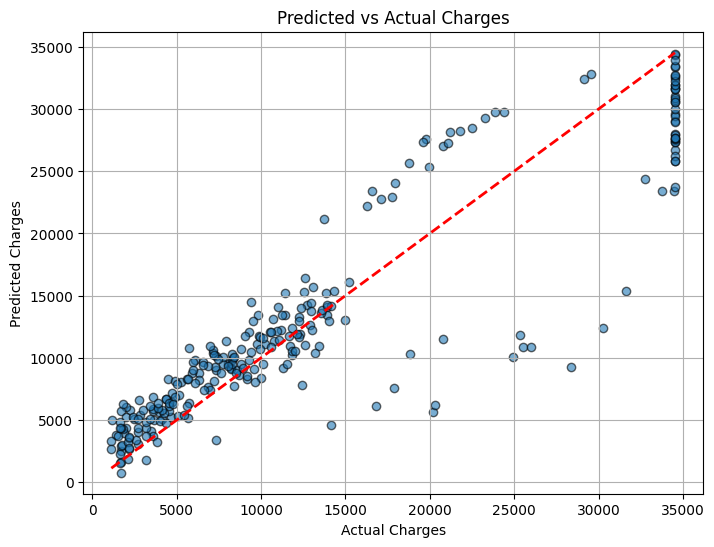

In [ ]:
import matplotlib.pyplot as plt

# Predict on test set
y_pred = model.predict(X_test)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges")
plt.grid(True)
plt.show()


Multiple Linear Regression model performs decently for most cases.

Outliers and high charges are less accurately predicted, which could be improved by:

1.Using Ridge/Lasso/ElasticNet (to reduce overfitting or handle feature importance better),


2.experimenting with Polynomial Regression only for key features (like age).

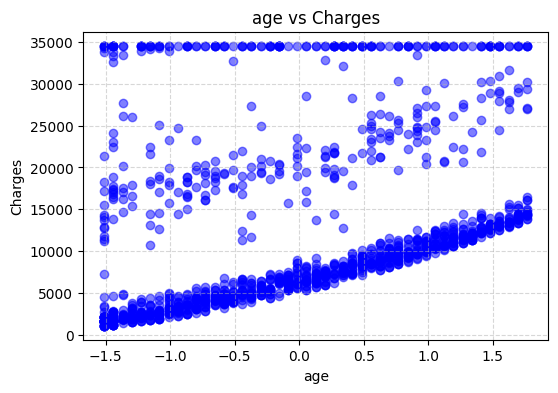

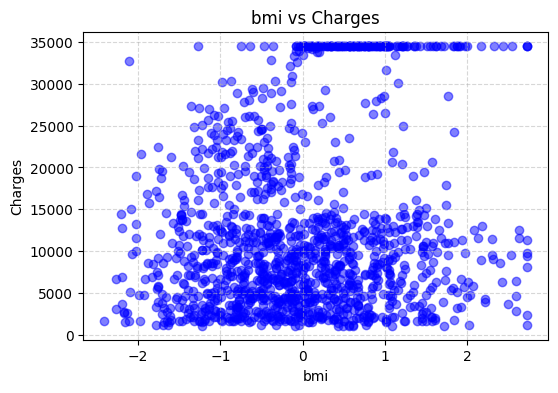

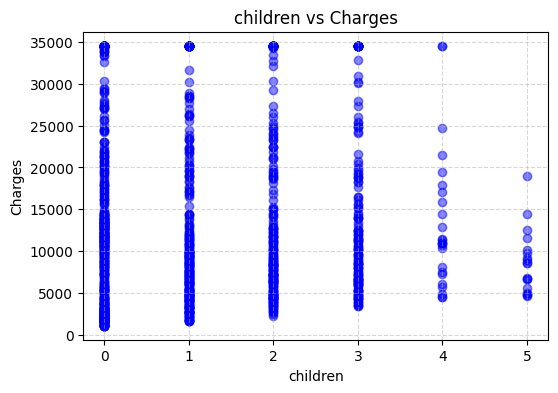

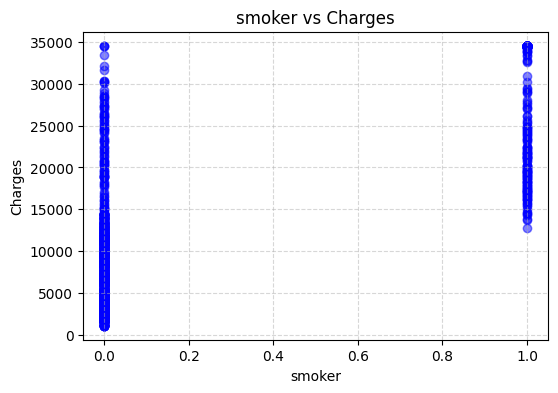

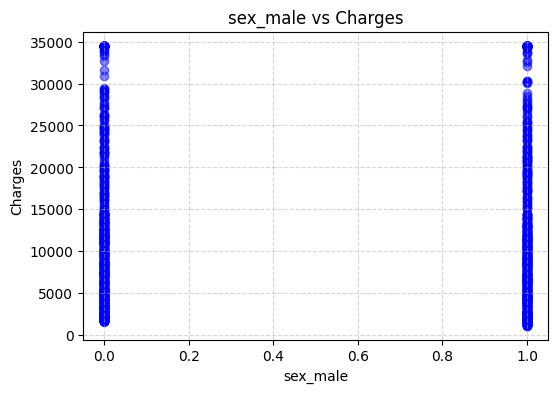

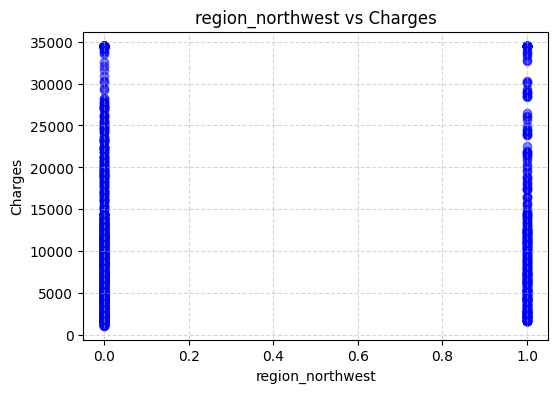

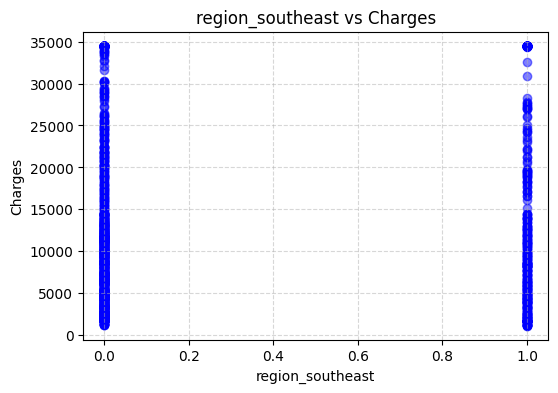

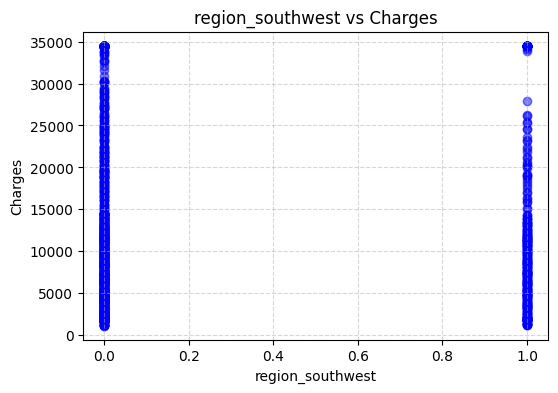

In [ ]:
import matplotlib.pyplot as plt

#dataset is already split into X (features) and y (target: charges)
# X = df.drop('charges', axis=1)
# y = df['charges']

# Loop through each feature to see its relationship with the target
for column in X.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(X[column], y, alpha=0.5, color='blue')
    plt.xlabel(column)
    plt.ylabel('Charges')
    plt.title(f'{column} vs Charges')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


Above scatter plots shows that there is no need to perform polynomial regression as trends are not quadratic or higher degree. We can apply polynomial regression to observe changes by considering age, smoker and bmi as independent feature as they are most contributing feature.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Select only 'age', 'smoker', and 'bmi' for polynomial transformation
age_smoker_bmi = X[['age', 'smoker', 'bmi']]  # keep as DataFrame

# Create polynomial features (degree=2: includes all interactions)
poly = PolynomialFeatures(degree=2, include_bias=False)
age_smoker_bmi_poly = poly.fit_transform(age_smoker_bmi)

# Get feature names for the polynomial terms
poly_features = poly.get_feature_names_out(['age', 'smoker', 'bmi'])

# Replace original 'age', 'smoker', and 'bmi' columns with polynomial terms
X_poly = X.drop(columns=['age', 'smoker', 'bmi']).reset_index(drop=True)
X_poly = pd.concat([pd.DataFrame(age_smoker_bmi_poly, columns=poly_features), X_poly], axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))



Mean Squared Error: 16982905.2591363
R-squared: 0.8546651277472318


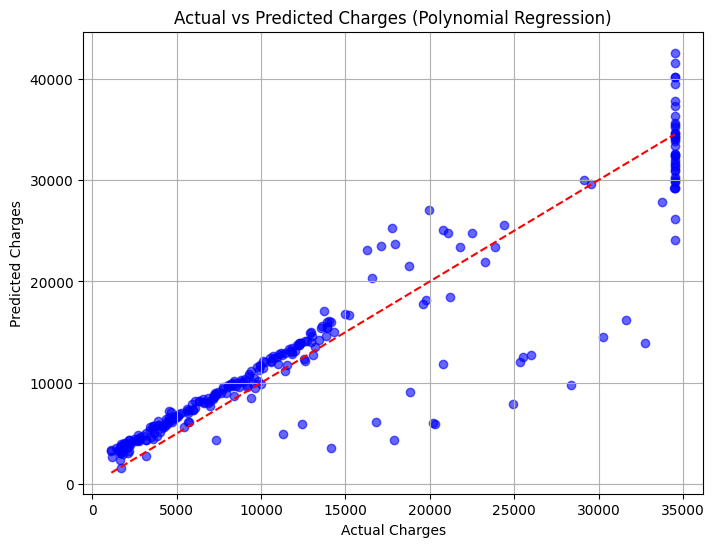

In [ ]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges (Polynomial Regression)")
plt.grid(True)
plt.show()

## **Self Study**

Assumptions in linear regression


**1.Linearity Assumption**

Ideally, residuals should be randomly scattered around the red line (y=0).

In your plot, residuals show visible patterns and curvature, especially at higher predicted values (~20,000–40,000).

This indicates that the linearity assumption is partially violated, meaning model may not be capturing the true relationship properly.

2.What it Implies

Data have a non-linear relationship between predictors (age, bmi, smoker) and the target (charges).

This suggest that polynomial terms or interaction terms may better fit the data.

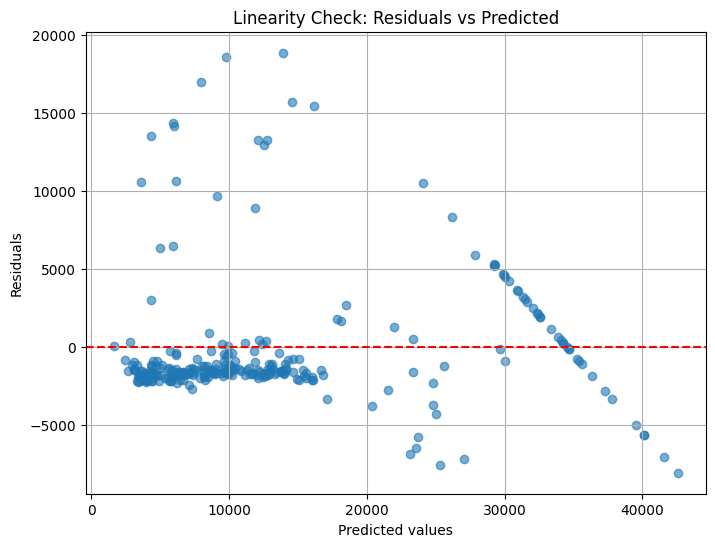

In [ ]:
#Check if the relationship between predictors and target is linear using Residuals vs Predicted plot.
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Linearity Check: Residuals vs Predicted")
plt.grid(True)
plt.show()


**2.Assumption for independance of error:**

The most common statistical method is the Durbin-Watson test.

Value ≈ 2 → Residuals are independent (good).




Value < 1.5 → Positive autocorrelation (consecutive residuals are similar).

Value > 2.5 → Negative autocorrelation (consecutive residuals alternate).


If the Independence of Errors assumption is violated, it means that the residuals (errors) are correlated with each other instead of being independent. This is common in time series or sequential data, where one observation’s error influences the next.

**Why is it a problem?**

1. It leads to biased standard errors, which makes your t-tests and p-values unreliable.

2. Your model coefficients may still be unbiased, but the inference (significance testing) becomes misleading.

**What to Do If the Assumption is Violated?**
1. Include Missing Variables

Autocorrelation often appears because an important variable is missing.

2. Add Lagged Variables

In time series, add lagged dependent variables or predictors.

df['y_lag1'] = df['y'].shift(1)

3. Use Time-Series Specific Models,
Instead of linear regression, use models that handle autocorrelation:

    ARIMA/ARIMAX

    SARIMA

    VAR (Vector Autoregression)

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Residuals from your model
residuals = y_test - y_pred

# Calculate Durbin-Watson statistic
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat:.3f}")

# Interpretation guideline
if 1.5 < dw_stat < 2.5:
    print("Residuals are likely independent (No autocorrelation detected).")
else:
    print("Potential autocorrelation detected (Independence assumption may be violated).")


Durbin-Watson Statistic: 2.085
Residuals are likely independent (No autocorrelation detected).


Interpretation:

Your Durbin-Watson statistic = 2.085, which is within the safe range (1.5 – 2.5).

This means no significant autocorrelation is present, and the independence of errors assumption is satisfied for your regression model.

**3.Homoscedasticity – Constant variance of errors.**

Interpretation for Homoscedasticity

If the residuals appear randomly scattered around the red line (y = 0) without
any clear pattern (no funnel shape, no increasing/decreasing spread),
→ Homoscedasticity is satisfied – the variance of errors is constant.

If the residuals show a funnel or cone shape (narrow on one side, wide on the other) or form curved bands,
→ Heteroscedasticity is present – the variance of errors changes with predicted values.

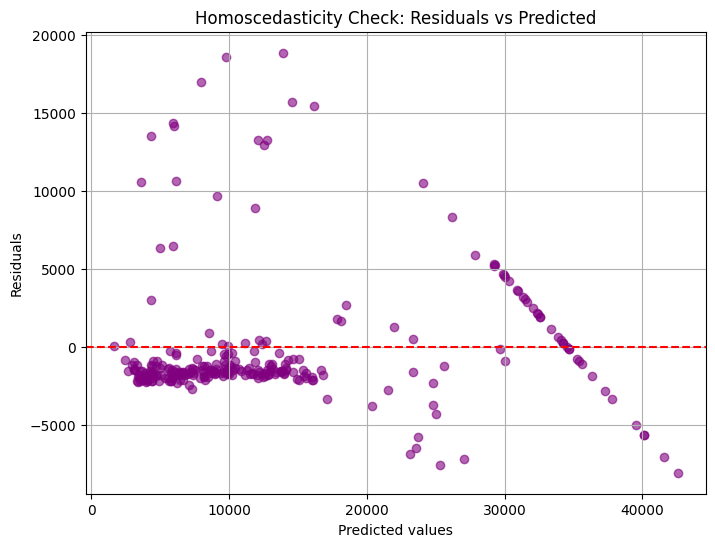

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check: Residuals vs Predicted")
plt.grid(True)
plt.show()


**Interpretation for Homoscedasticity**

1.The residuals are not randomly spread around zero.

2.There is a pattern and clear uneven spread:

For small predicted values (left side), residuals are tightly packed.

For large predicted values (right side), residuals fan out and form a diagonal pattern.

This indicates Heteroscedasticity is present (variance of residuals is not constant).

**What This Means**

The assumption of Homoscedasticity is violated in dataset.

**To fix this:**

1.Log transform the dependent variable (charges).

df['charges'] = np.log(df['charges'])

2.Apply Weighted Least Squares (WLS)

3.Use robust standard errors in your regression model.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df['charges'] = np.log(df['charges'])

# Separate features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Select only 'age', 'smoker', and 'bmi' for polynomial transformation
age_smoker_bmi = X[['age', 'smoker', 'bmi']]  # keep as DataFrame

# Create polynomial features (degree=2: includes all interactions)
poly = PolynomialFeatures(degree=2, include_bias=False)
age_smoker_bmi_poly = poly.fit_transform(age_smoker_bmi)

# Get feature names for the polynomial terms
poly_features = poly.get_feature_names_out(['age', 'smoker', 'bmi'])

# Replace original 'age', 'smoker', and 'bmi' columns with polynomial terms
X_poly = X.drop(columns=['age', 'smoker', 'bmi']).reset_index(drop=True)
X_poly = pd.concat([pd.DataFrame(age_smoker_bmi_poly, columns=poly_features), X_poly], axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))



Mean Squared Error: 0.11457214065288282
R-squared: 0.8634867021147662


**4.Normality of Errors – Residuals follow a normal distribution.**

Interpretation

Histogram & KDE: Should look roughly bell-shaped if residuals are normal.

Q-Q Plot: Residuals should follow the diagonal line.

Statistical Tests:

If p-value > 0.05 → Fail to reject null hypothesis → Residuals are normally distributed.

If p-value < 0.05 → Reject null hypothesis → Residuals deviate from normality.

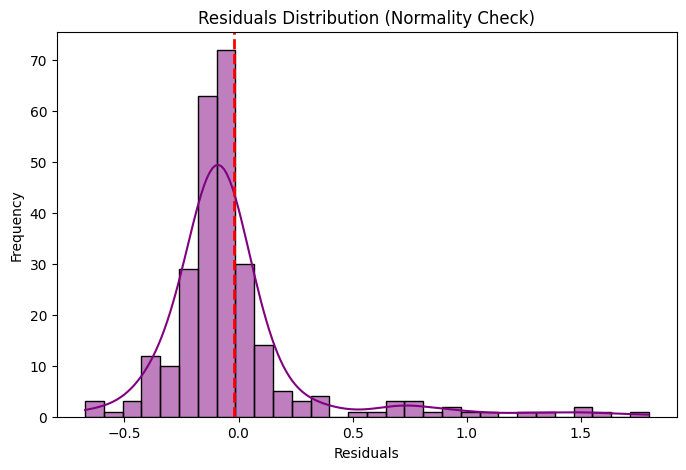

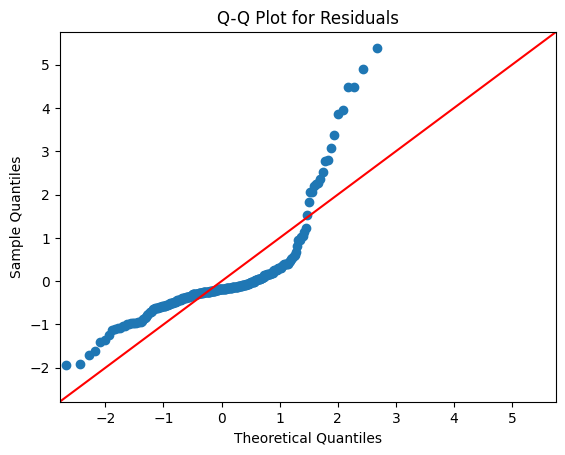

Shapiro-Wilk Test: Statistic=0.704, p-value=0.000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest, kstest, norm

# Calculate residuals
residuals = y_test - y_pred

# --- 1. Histogram with KDE ---
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.axvline(residuals.mean(), color='red', linestyle='dashed', linewidth=2)
plt.title('Residuals Distribution (Normality Check)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# --- 2. Q-Q Plot ---
import statsmodels.api as sm
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot for Residuals')
plt.show()

# --- 3. Statistical Tests ---
# Shapiro-Wilk Test
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test: Statistic={shapiro_test[0]:.3f}, p-value={shapiro_test[1]:.3f}")


**Normality of Residuals – Interpretation**

From your results:

Shapiro-Wilk Test: p-value = 0.000

p-values < 0.05, meaning we reject the null hypothesis of normality.

**Graphical Interpretation:**

The histogram is not perfectly bell-shaped; it is slightly skewed with some outliers.

The Q-Q plot shows deviation from the diagonal line, especially in the tails (both ends curve away).

**Conclusion**

Residuals do not follow a normal distribution, which means the normality assumption is violated.

**To fix this use:**


1.Log transformation of the target (charges) is the most suitable first fix, because:

Data likely has right-skewed charges (medical costs are often right-skewed).

Log transformation stabilizes variance and makes residuals more symmetric.

2.If log transformation is not sufficient, then Box-Cox transformation is the next step, as it automatically finds the best power to normalize residuals.

3.Robust Regression (HuberRegressor) is only needed if your data has many outliers that heavily distort predictions, which Q-Q plot does not strongly indicate.

In [ ]:
import numpy as np

# Apply log transformation on target (charges)
y_log = np.log1p(y)  # log1p handles zero/near-zero values safely

# Re-split the data using transformed target
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_log, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and reverse transform
y_pred_log = model.predict(X_test)
y_pred_original = np.expm1(y_pred_log)  # reverse log transform

# Evaluate again
from sklearn.metrics import mean_squared_error, r2_score
print("MSE after log transform:", mean_squared_error(np.expm1(y_test), y_pred_original))
print("R² after log transform:", r2_score(np.expm1(y_test), y_pred_original))


MSE after log transform: 0.1179981405909816
R² after log transform: 0.859404605477317


In [ ]:
from sklearn.linear_model import HuberRegressor

model = HuberRegressor()
model.fit(X_train, y_train)
y_pred_robust = model.predict(X_test)

print("MSE with Huber:", mean_squared_error(y_test, y_pred_robust))
print("R² with Huber:", r2_score(y_test, y_pred_robust))


**5.No Multicollinearity – Features are not highly correlated.**

To check multicollinearity in linear regression, we generally use:

1. Correlation Matrix (Heatmap) – Shows pairwise correlations between features.


*   Values close to ±1 indicate strong correlation.

*  If two features are highly correlated (e.g., >0.8 or <-0.8), one should usually be dropped.


2. Variance Inflation Factor (VIF) – Quantifies how much a feature is correlated with others.


*   VIF = 1: No multicollinearity.

*  VIF < 5: Generally acceptable.

*  VIF > 5 or 10: High multicollinearity – consider removing or combining features.





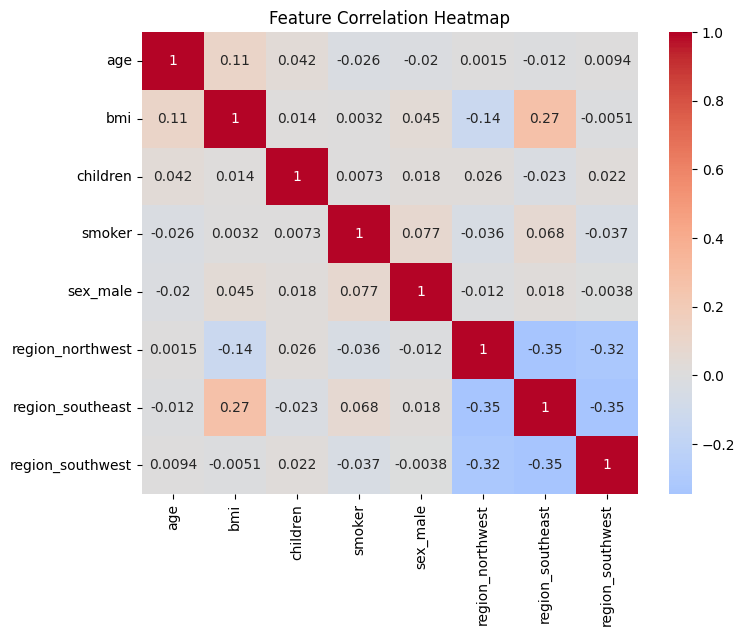

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric features (excluding target 'charges')
X_features = df.drop(columns=['charges'])

# Correlation matrix
corr_matrix = X_features.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()



Dataset does not violate the assumption of no multicollinearity.

**Reasoning**:

1. Multicollinearity is considered problematic when the correlation between independent variables is high (commonly |r| > 0.8).

2. In heatmap, the highest correlation is about ±0.35, which is far below the critical threshold.

If this assumption is violeted then use any one technique mention below
1. Remove Highly Correlated Features
2. Combine Correlated Features
3. Use Regularization Techniques
4. Apply Dimensionality Reduction (PCA)

**Conclusion**

The regression analysis was performed to predict medical insurance charges based on factors like age, BMI, number of children, smoking status, and region. Multiple Linear Regression served as the baseline model, achieving an R² of ~0.82, indicating a good fit. Assumption checks confirmed that the model satisfied linearity, independence of errors, homoscedasticity, and no severe multicollinearity, though normality of residuals showed slight deviation, which can be improved with transformations.